In [12]:
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [25]:
#Download image dataset for classification from http://www.vision.caltech.edu/Image_Datasets/Caltech101/

#Load all 800 airplane filenames from dataset and store in a list
filelist = glob.glob('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 4\\Images RBM\\101_ObjectCategories\\airplanes\*.jpg')

In [26]:
X = np.array([np.array(Image.open(fname)) for fname in filelist])

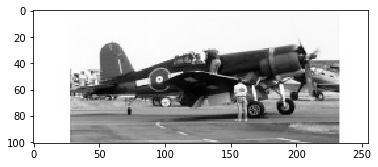

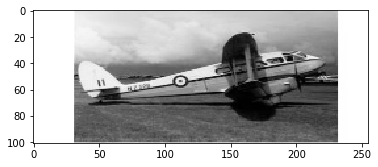

In [30]:
#Resize and convert to black and white for all airplane images

#First, Create an array for ALL resized airplane images to be used in the RBM model
resize_array = np.array([np.array(cv2.resize(X[i], (255, 101))) for i in range(len(X))])

#Now, Need to specify shape of the zeros array for the conversion to black/white. Prior methodology gave error
#Does not allow for array dimension > 32. Have to create another array with the correct shape for the zeros_like function in np
array_shape = np.array([np.array(cv2.resize(X[i][0], (255, 101))) for i in range(len(X))])
bw_resized = np.zeros_like(array_shape)

#Now fill the zeros array with the converted RGB --> black/white pixel values
#Convert each pixel from RGB to grayscale using recommended values here: https://samarthbhargav.wordpress.com/2014/05/05/image-processing-with-python-rgb-to-grayscale-conversion/

def weightedAverage(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

for img in range(len(bw_resized)):
    for pix_row in range(len(bw_resized[img])):
        for pix_col in range(len(bw_resized[img][0])):
            bw_resized[img][pix_row][pix_col] = weightedAverage(resize_array[img][pix_row][pix_col])

#Test a few random images to ensure it worked
plt.imshow(bw_resized[40], cmap = matplotlib.cm.Greys_r)
plt.show()

plt.imshow(bw_resized[50], cmap = matplotlib.cm.Greys_r)
plt.show()

In [16]:
#Lets load some other data (non-airplane) and see how well we can classify on a test set

#Load all 67 ferry filenames from dataset and store in a list
ferry = glob.glob('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 4\\Images RBM\\101_ObjectCategories\\ferry\*.jpg')

In [17]:
X2 = np.array([np.array(Image.open(fname)) for fname in ferry])

In [18]:
#Resize and convert to black and white for all ferry images

#Image #17 and #45 for ferries were black and white, so I deleted them from the dataset -- too complicated to 
#create extra code around 2 images...

#First, Create an array for ALL resized ferry images to be used in the RBM model
f_resize_array = np.array([np.array(cv2.resize(X2[i], (255, 101))) for i in range(len(X2))])

#Now, Need to specify shape of the zeros array for the conversion to black/white. Prior methodology gave error
#Does not allow for array dimension > 32. Have to create another array with the correct shape for the zeros_like function in np
f_array_shape = np.array([np.array(cv2.resize(X2[i][0], (255, 101))) for i in range(len(X2))])
f_bw_resized = np.zeros_like(f_array_shape)

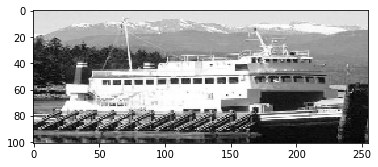

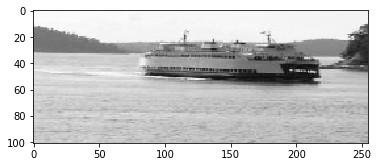

In [19]:
#Now fill the zeros array with the converted RGB --> black/white pixel values

for img in range(len(f_bw_resized)):
    for pix_row in range(len(f_bw_resized[img])):
        for pix_col in range(len(f_bw_resized[img][0])):
            f_bw_resized[img][pix_row][pix_col] = weightedAverage(f_resize_array[img][pix_row][pix_col])

#Test a few random images to ensure it worked
plt.imshow(f_bw_resized[40], cmap = matplotlib.cm.Greys_r)
plt.show()

plt.imshow(f_bw_resized[50], cmap = matplotlib.cm.Greys_r)
plt.show()

In [31]:
#Now ravel all of the images for importing into the fit function of the RBM algo
bw_ravel = np.array([bw_resized[img].ravel() for img in range(len(bw_resized))])
f_bw_ravel = np.array([f_bw_resized[img].ravel() for img in range(len(f_bw_resized))])

[BernoulliRBM] Iteration 1, pseudo-likelihood = 0.00, time = 12.16s
[BernoulliRBM] Iteration 2, pseudo-likelihood = 0.00, time = 12.61s
[BernoulliRBM] Iteration 3, pseudo-likelihood = 0.00, time = 12.71s
[BernoulliRBM] Iteration 4, pseudo-likelihood = 0.00, time = 12.96s
[BernoulliRBM] Iteration 5, pseudo-likelihood = 0.00, time = 12.79s
[BernoulliRBM] Iteration 6, pseudo-likelihood = 0.00, time = 12.56s
[BernoulliRBM] Iteration 7, pseudo-likelihood = 0.00, time = 13.11s
[BernoulliRBM] Iteration 8, pseudo-likelihood = 0.00, time = 13.96s
[BernoulliRBM] Iteration 9, pseudo-likelihood = 0.00, time = 12.76s
[BernoulliRBM] Iteration 10, pseudo-likelihood = 0.00, time = 12.63s
[BernoulliRBM] Iteration 11, pseudo-likelihood = 0.00, time = 12.66s
[BernoulliRBM] Iteration 12, pseudo-likelihood = 0.00, time = 12.71s
[BernoulliRBM] Iteration 13, pseudo-likelihood = 0.00, time = 13.23s
[BernoulliRBM] Iteration 14, pseudo-likelihood = 0.00, time = 14.35s
[BernoulliRBM] Iteration 15, pseudo-likelih

c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic regression using raw pixel features:
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       243
          2       0.65      0.65      0.65        17

avg / total       0.95      0.95      0.95       260




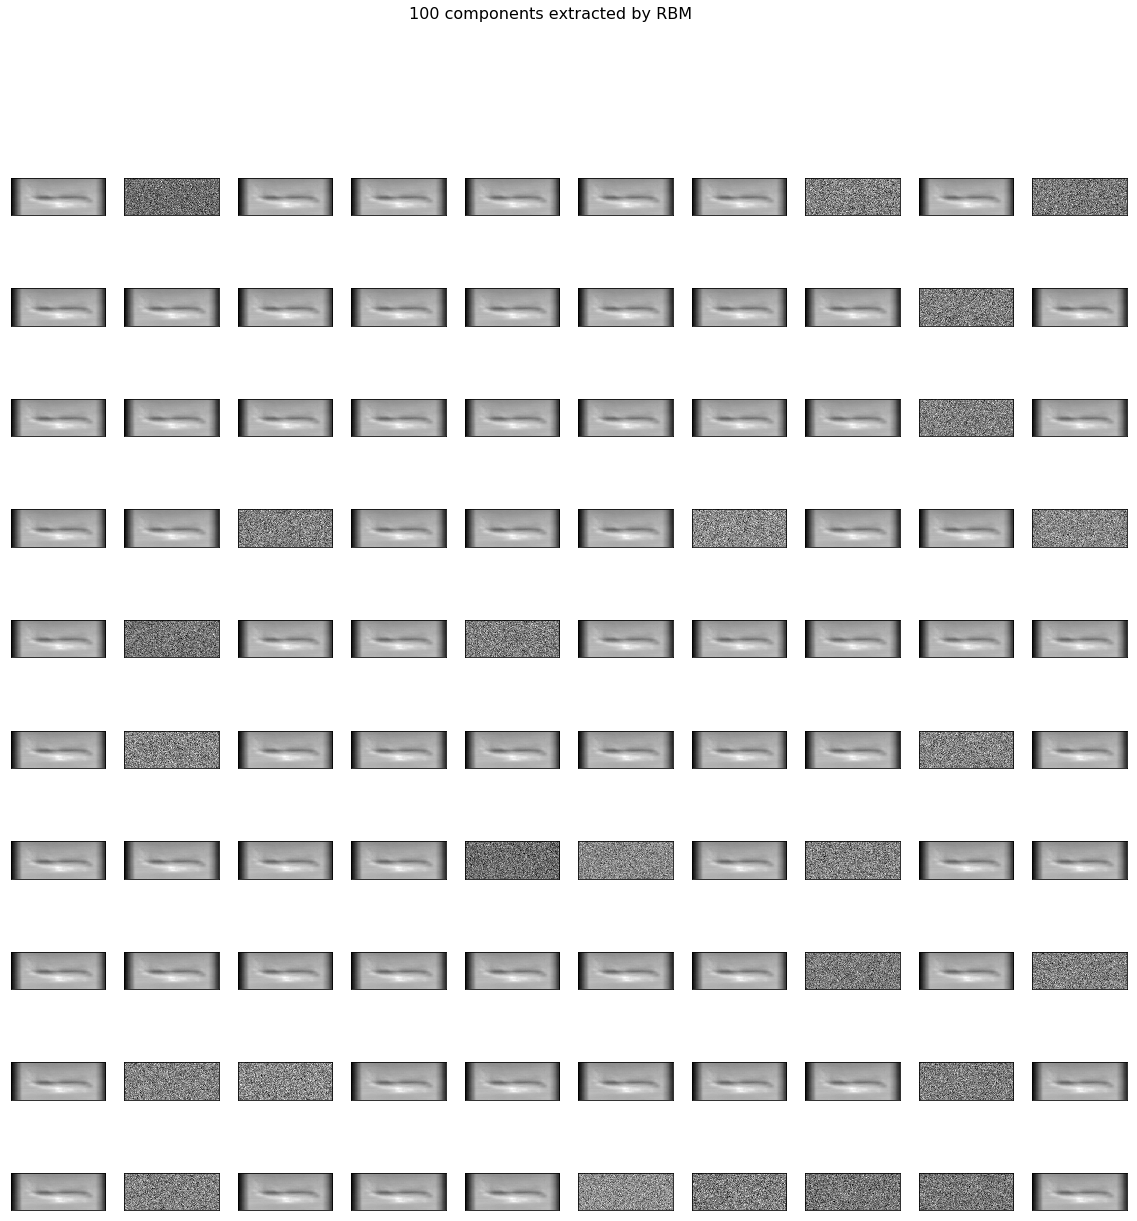

In [32]:
#Combine airplane and ferry datasets together, and create an identifier for each in a "target" variable
from sklearn.model_selection import train_test_split

DATA = np.concatenate([bw_ravel] + [f_bw_ravel])
TARGET = np.concatenate([[1] * len(bw_ravel)] + [[2] * len(f_bw_ravel)])

X_train, X_test, y_train, y_test = train_test_split(DATA, TARGET, test_size = 0.3)

# Models we will use
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True, learning_rate = 0.05, n_iter = 20, n_components = 100)
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

logistic.C = 6000.0
#logistic.class_weight = 'balanced'

# Training RBM-Logistic Pipeline
classifier.fit(X_train, y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, y_train)

#Compare RBM+Logistic to just Logistic model
print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        y_test,
        logistic_classifier.predict(X_test))))

#Visualize the components

plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((101, 255)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)

plt.show()

In [33]:
#Try 'nudging' dataset to create more data for the boat models (only 65 ferry images total at this point)

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 101x255 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((101, 255)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y


DATA, TARGET = nudge_dataset(DATA, TARGET)
DATA = (DATA - np.min(DATA, 0)) / (np.max(DATA, 0) + 0.0001)  # 0-1 scaling

[BernoulliRBM] Iteration 1, pseudo-likelihood = -16956.88, time = 57.25s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -17304.15, time = 63.16s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -16780.14, time = 59.26s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -16516.26, time = 59.13s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -16743.81, time = 60.18s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -16678.43, time = 61.56s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -16509.83, time = 61.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -16670.46, time = 60.52s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -16589.65, time = 59.77s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -16507.82, time = 59.56s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -16481.83, time = 60.11s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -16404.07, time = 59.82s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -16244.12, time = 59.77s
[BernoulliRBM] Iteration 14, pseudo-likelihood 

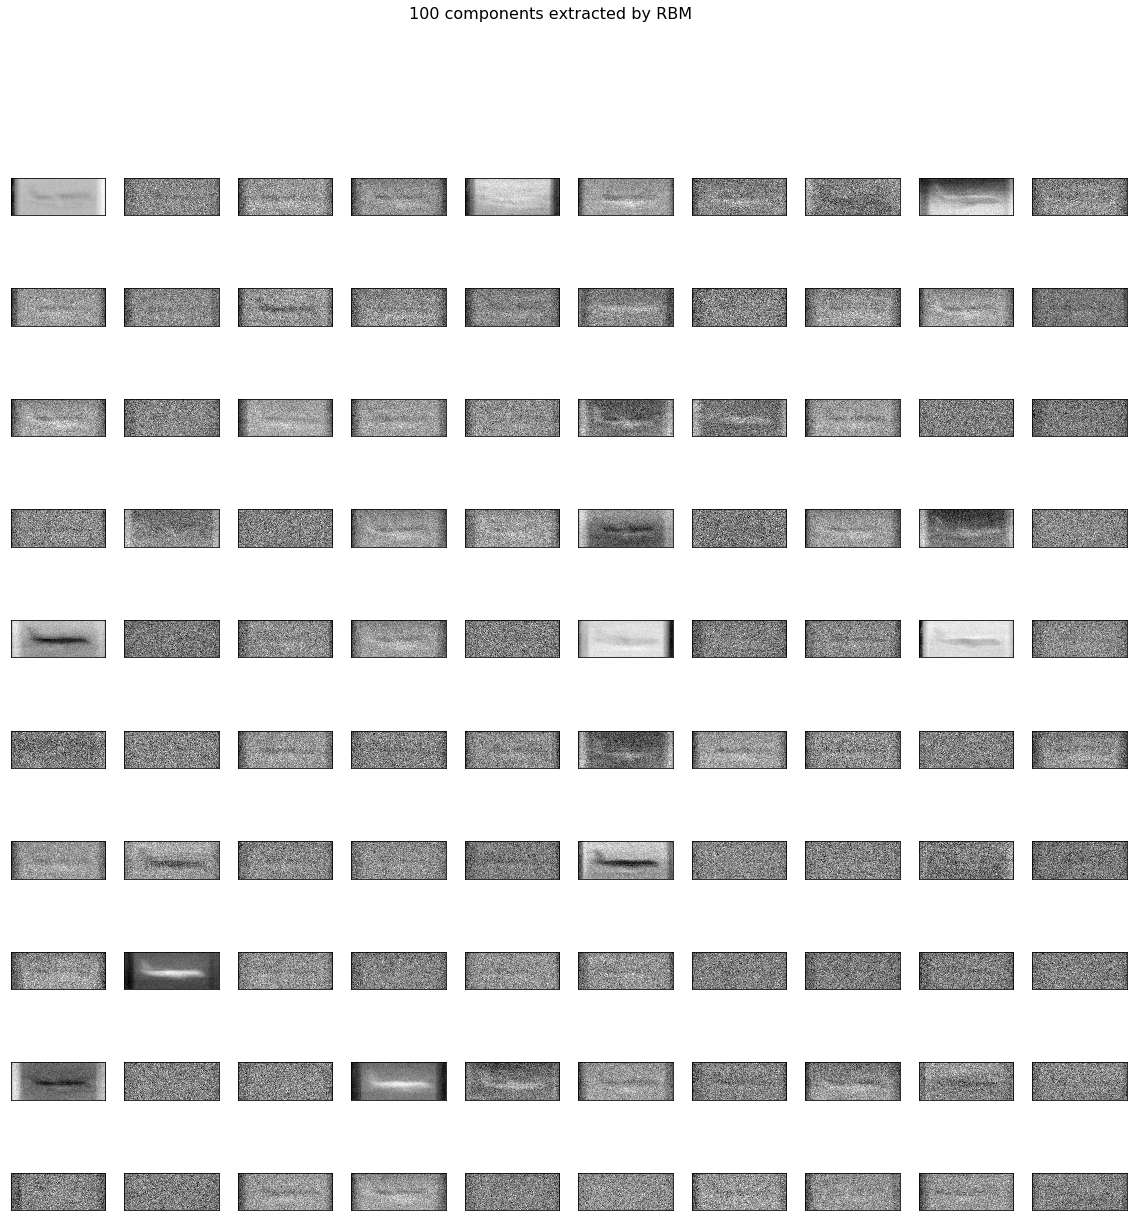

In [38]:
X_train, X_test, y_train, y_test = train_test_split(DATA, TARGET, test_size = 0.3)

# Models we will use
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True, learning_rate = 0.05, n_iter = 20, n_components = 100)
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

logistic.C = 6000.0
#logistic.class_weight = 'balanced'

# Training RBM-Logistic Pipeline
classifier.fit(X_train, y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, y_train)

#Compare RBM+Logistic to just Logistic model
print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        y_test,
        logistic_classifier.predict(X_test))))

#Visualize the components

plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((101, 255)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)

plt.show()

In [ ]:
#Try a grid-search optimization for the RBM-Logistic model...can we make it any better?

#Find Best Multi-Layer Perceptron Parameters

from sklearn import neural_network
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(DATA, TARGET, test_size = 0.3)

rbm = BernoulliRBM()
logistic = linear_model.LogisticRegression()

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

#Double under-bars to specify which part of the pipeline the parameters belong to
tuned_parameters = [{'rbm__learning_rate': [0.001, 0.001, 0.01, 0.05, 0.1],
                     'rbm__n_iter': [3, 5, 10, 20, 30],
                     'rbm__n_components': [5, 10, 25, 50, 100, 200]
                     },
                   
                    {'logistic__class_weight': ['balanced', None],
                    'logistic__C': [0.1, 1, 10, 100, 1000, 10000],
                    'logistic__dual': [True, False],
                    'logistic__max_iter': [500]
                    }]
 
gscv = GridSearchCV(classifier, param_grid = tuned_parameters, cv = 3, n_jobs = -1)
gscv.fit(X_train, y_train)
gscv.best_estimator_

In [ ]:
#Questions: How does n_components affect the model?

#Do all pictures in fact need to have the same dimensions (in terms of pixels)

#Is it "cheating" to use the nudge method, since many of those nudged samples will be in the test set? We trained on similar
#ones. Will more 'nudges' with different pixel movements improve performance?

#For the grid-search portion, is my parameter grid set up correctly?